**PREDICTING BREAST CANCER USING ARTIFICIAL NEURAL NETWORKS.**

* The features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.
* 1 = Malignant (Cancerous) - Present (M)
* 0 = Benign (Not Cancerous) -Absent (B)

**HERE I HAVE APPLIED SOME TECHNIQUES TO AVOID OVERFITTING ALSO**

In [ ]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
#importing dataset
ds = pd.read_csv('/content/data (1).csv')

In [ ]:
#reviewing dataset
pd.set_option('display.max_columns',None)
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#dropping unnecessary features
ds.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
#checking type of feaures
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#dataset has 569 rows and 31 columns
ds.shape

(569, 31)

In [ ]:
#checking for null values
ds.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**NO MISSING VALUES**

In [ ]:
#taking care of categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['diagnosis']=le.fit_transform(ds['diagnosis'])

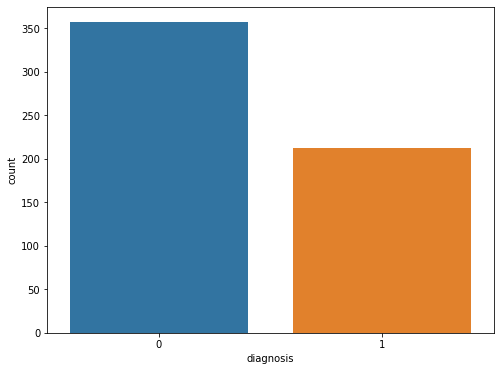

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'diagnosis', data = ds)

**AROUND 350 ARE Benign**

Text(0.5, 1.0, 'Correlation Map')

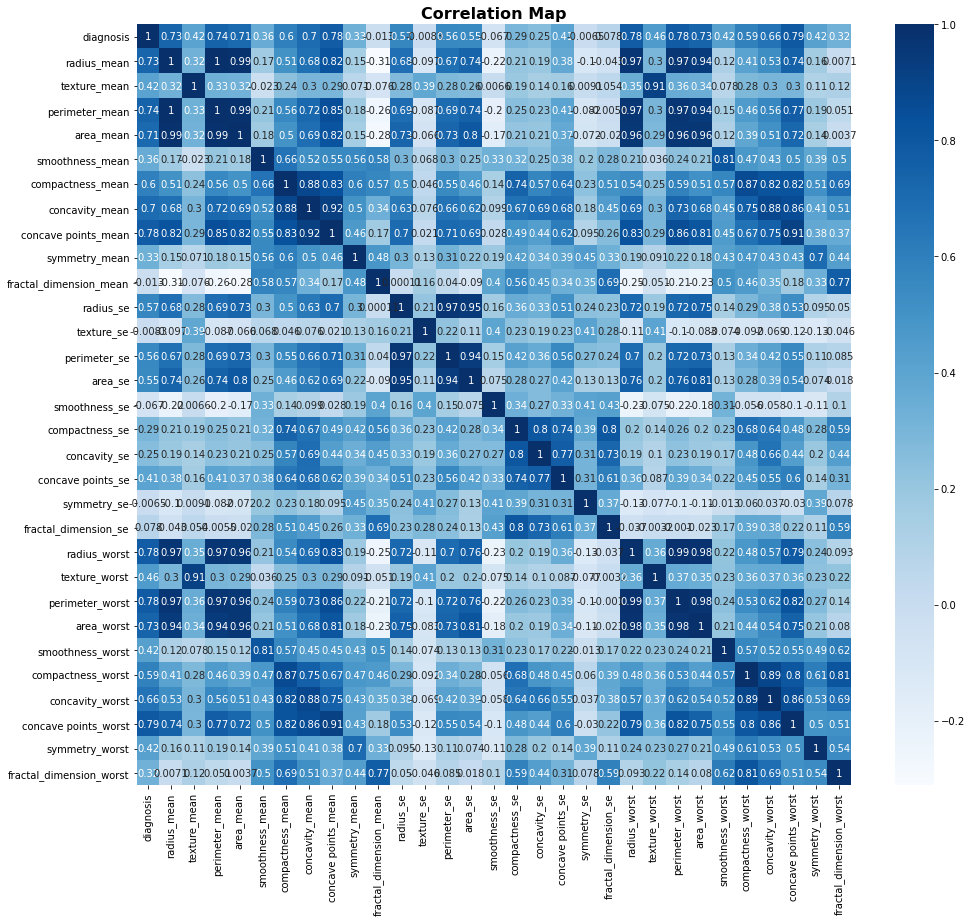

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(ds.corr(), cmap='Blues', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

**CORRELATION WAS FOUND IN SOME FEATURES**

**WE CAN EITHER REMOVE THE HIGH CORRELATED FEATURES OR WE CAN USE ALL THE FEATURES, I AM USING ALL FEATURES.**

* **REMOVING CORRELATED FEATURES MAY INCREASE ACCURACY**

In [ ]:
#defining dependent and independent variables
x = ds.drop('diagnosis', axis=1)
y = ds['diagnosis']

In [ ]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**FEATURE SCALING IS NECESSARY IN ANN**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from tensorflow.keras.layers import Dropout


#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = tf.keras.models.Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor = 'accuracy', mode = 'max',patience = 25)

In [ ]:
#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
ann.fit(x_train, y_train,batch_size = 32, epochs = 400,callbacks = [early])

Epoch 1/400
15/15 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.6989
Epoch 2/400
15/15 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7736
Epoch 3/400
15/15 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7956
Epoch 4/400
15/15 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8637
Epoch 5/400
15/15 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8725
Epoch 6/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8835
Epoch 7/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.9033
Epoch 8/400
15/15 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9560
Epoch 9/400
15/15 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9385
Epoch 10/400
15/15 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.9341
Epoch 11/

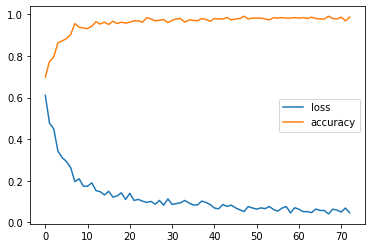

In [ ]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [ ]:
#GETTING ACCURACY AND CONFUSION MATRIX
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = ann.predict(x_test)
y_pred  = y_pred > 0.5
cm = confusion_matrix(y_pred,y_test)
ac = accuracy_score(y_pred,y_test)

In [ ]:
ac

0.9649122807017544

In [ ]:
cm

array([[65,  2],
       [ 2, 45]])

Accuracy - 96.49122807017544%


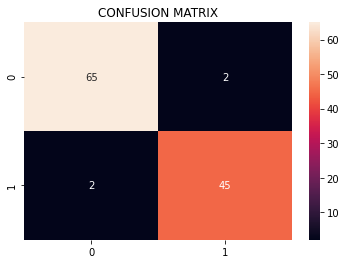

In [ ]:
sns.heatmap(cm,annot = True)
plt.title('CONFUSION MATRIX')
print('Accuracy - {}%'.format(ac*100))